**Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Loading Dataset**

In [5]:
dataset = pd.read_csv("Dataset.csv")
dataset.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [6]:
dataset.tail()

,Index,message to examine,label (depression result)
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1
10313,802313,0,1


<ipython-input-7-93e49460278f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


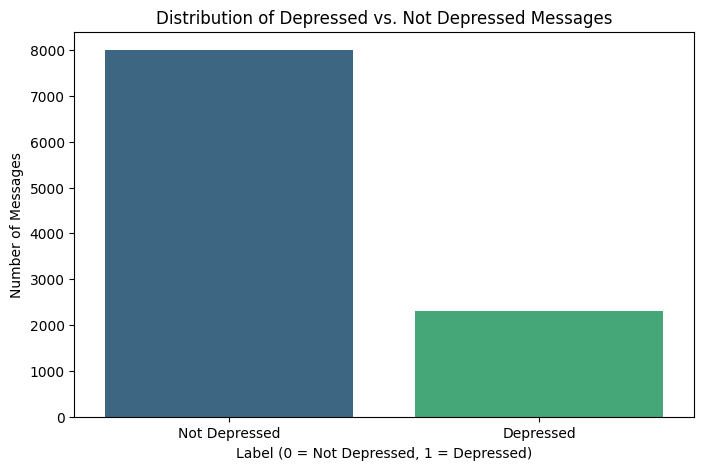

In [7]:
label_counts = dataset['label (depression result)'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')

plt.xlabel('Label (0 = Not Depressed, 1 = Depressed)')
plt.ylabel('Number of Messages')
plt.title('Distribution of Depressed vs. Not Depressed Messages')
plt.xticks([0, 1], ['Not Depressed', 'Depressed'])
plt.show()


# **Data-Preprocessing**

**Checking Missing Details**

In [8]:
missing_values = dataset.isnull()
print(missing_values)

       Index  message to examine  label (depression result)
0      False               False                      False
1      False               False                      False
2      False               False                      False
3      False               False                      False
4      False               False                      False
...      ...                 ...                        ...
10309  False               False                      False
10310  False               False                      False
10311  False               False                      False
10312  False               False                      False
10313  False               False                      False

[10314 rows x 3 columns]


In [9]:
missing_value_count = dataset.isna().sum()
print(missing_value_count)

Index                        0
message to examine           0
label (depression result)    0
dtype: int64


**Checking Duplicate Values**

In [10]:
duplicate_values = dataset.duplicated()
print(dataset[duplicate_values])


Empty DataFrame
Columns: [Index, message to examine, label (depression result)]
Index: []


**NLP Preprocessing**

**Text Cleaning**

In [11]:
import re
import string
from bs4 import BeautifulSoup


In [12]:
def cleanText(text):
  text = text.lower()
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'<Emoji:.*?>', '', text)
  text = re.sub(r'http\S+|www\S+', '', text)
  text = text.translate(str.maketrans('','',string.punctuation))
  text = re.sub(r'\W',' ',text)
  text = BeautifulSoup(text, "html.parser").get_text()
  text = re.sub(r'\s+', ' ', text)
  text = text.strip()
  return text

In [13]:
dataset['message to examine'] = dataset['message to examine'].apply(cleanText)

In [14]:
dataset['message to examine'].head()

,message to examine
0,just had a real good moment i missssssssss him...
1,is reading manga
2,comeagainjen
3,lapcat need to send em to my accountant tomorr...
4,add me on myspace myspacecomlookthunder


In [15]:
dataset.head(10)

,Index,message to examine,label (depression result)
0,106,just had a real good moment i missssssssss him...,0
1,217,is reading manga,0
2,220,comeagainjen,0
3,288,lapcat need to send em to my accountant tomorr...,0
4,540,add me on myspace myspacecomlookthunder,0
5,624,so sleepy good times tonight though,0
6,701,silkcharm re nbn as someone already said does ...,0
7,808,or ï ½c possible today nice,0
8,1193,nite twitterville workout in the am ciao,0
9,1324,dananner night darlin sweet dreams to you,0


**Tokenization**

In [16]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
dataset['message to examine'] = dataset['message to examine'].apply(word_tokenize)

In [18]:
dataset["message to examine"].head()

,message to examine
0,"[just, had, a, real, good, moment, i, missssss..."
1,"[is, reading, manga]"
2,[comeagainjen]
3,"[lapcat, need, to, send, em, to, my, accountan..."
4,"[add, me, on, myspace, myspacecomlookthunder]"


**Stop Words Removal**

In [19]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
stop_words = set(stopwords.words('english'))

In [21]:
dataset["message to examine"] = dataset['message to examine'].apply(
    lambda x: [i for i in x if i not in stop_words]
)

In [22]:
dataset.tail(10)

,Index,message to examine,label (depression result)
10304,802304,"[reagan, bush, trump, gop, used, maga, slogan,...",1
10305,802305,"[rt, depression, could, improved, vitamin, def...",1
10306,802306,"[actors, symptoms, adult, depression, naked, g...",1
10307,802307,"[gaindaswamy, kanatungaa, beinghumor, theskind...",1
10308,802308,"[many, sufferers, depression, arent, sad, feel...",1
10309,802309,"[depression, g, herbo, mood, im, done, stressi...",1
10310,802310,"[depression, succumbs, brain, makes, feel, lik...",1
10311,802311,"[ketamine, nasal, spray, shows, promise, depre...",1
10312,802312,"[dont, mistake, bad, day, depression, everyone...",1
10313,802313,[],1


**Lemmatization**

In [23]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
lemmatizer = WordNetLemmatizer()

In [25]:
dataset["message to examine"] = dataset['message to examine'].apply(
    lambda x: [lemmatizer.lemmatize(i) for i in x]
)

In [26]:
dataset["message to examine"].tail(10)

,message to examine
10304,"[reagan, bush, trump, gop, used, maga, slogan,..."
10305,"[rt, depression, could, improved, vitamin, def..."
10306,"[actor, symptom, adult, depression, naked, gte..."
10307,"[gaindaswamy, kanatungaa, beinghumor, theskind..."
10308,"[many, sufferer, depression, arent, sad, feel,..."
10309,"[depression, g, herbo, mood, im, done, stressi..."
10310,"[depression, succumbs, brain, make, feel, like..."
10311,"[ketamine, nasal, spray, show, promise, depres..."
10312,"[dont, mistake, bad, day, depression, everyone..."
10313,[]


# **Feature Engineering**

**Sentiment Analysis**

In [27]:
!pip install textblob==0.17.1
from textblob import TextBlob

def get_sentiment(tokens):
    analysis = TextBlob(" ".join(tokens))
    return analysis.sentiment.polarity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.19.0
    Uninstalling textblob-0.19.0:
      Successfully uninstalled textblob-0.19.0


In [28]:
dataset['sentiment'] = dataset['message to examine'].apply(get_sentiment)

In [29]:
dataset['sentiment'].head()

,sentiment
0,0.600000
1,0.000000
2,0.000000
3,0.041667
4,0.000000


**Negation Detection (using a simple rule-based approach)**

In [30]:
def detect_negation(tokens):
    negation_words = ["no", "not", "never", "don't", "doesn't", "didn't", "won't", "wouldn't", "can't", "couldn't", "shouldn't"]  # Add more if needed
    for word in tokens:
        if word in negation_words:
            return 1  # Negation present
    return 0  # Negation absent

In [31]:
dataset['negation'] = dataset['message to examine'].apply(detect_negation)

In [32]:
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

def join_tokens(tokens):
    return " ".join(tokens)

In [33]:
dataset['joined_text'] = dataset['message to examine'].apply(join_tokens)

vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_features = vectorizer.fit_transform(dataset['joined_text'])

# Convert the sparse matrix to a dense array
tfidf_features_dense = tfidf_features.toarray()

# Create a DataFrame from the dense array
tfidf_df = pd.DataFrame(tfidf_features_dense, columns=vectorizer.get_feature_names_out())

# Concatenate the TF-IDF features with the original DataFrame
dataset = pd.concat([dataset, tfidf_df], axis=1)

# **Model Prep**

**Preparing the Data for LSTM Model**


In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [35]:
X = dataset[['sentiment', 'negation'] + list(vectorizer.get_feature_names_out())].values
y = dataset['label (depression result)'].values

**Splitting the Dataset**

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [37]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

**Building the Model**

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2

In [42]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],),
                kernel_regularizer=l2(0.07)))  # Input shape based on features, L2 regularization #0.5 better perf
model.add(Dropout(0.3))  # Increased dropout for regularization #0.4 better perf
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01))) # Added a hidden layer with regularization
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))  # Assuming 2 classes (depressed/not depressed)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7469 - loss: 8.2352 - val_accuracy: 0.7783 - val_loss: 0.6522
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7749 - loss: 0.5919 - val_accuracy: 0.7783 - val_loss: 0.4958
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7739 - loss: 0.4810 - val_accuracy: 0.8643 - val_loss: 0.4479
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8609 - loss: 0.4395 - val_accuracy: 0.8534 - val_loss: 0.4228
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8895 - loss: 0.4257 - val_accuracy: 0.8934 - val_loss: 0.3943
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9153 - loss: 0.3861 - val_accuracy: 0.9122 - val_loss: 0.3771
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9334 - loss: 0.3713 - val_accuracy: 0.9546 - val_loss: 0.3657
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9448 - loss: 0.3634 - val_a

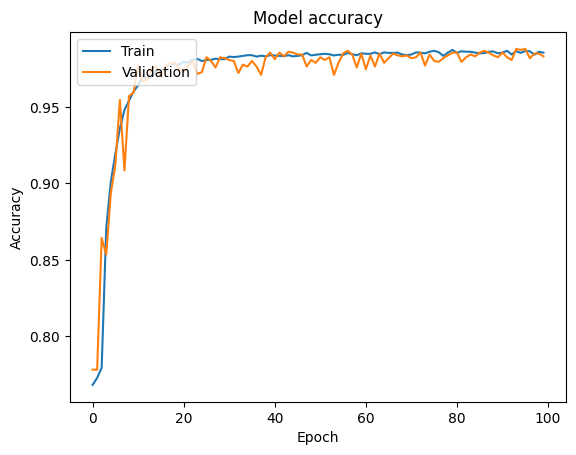

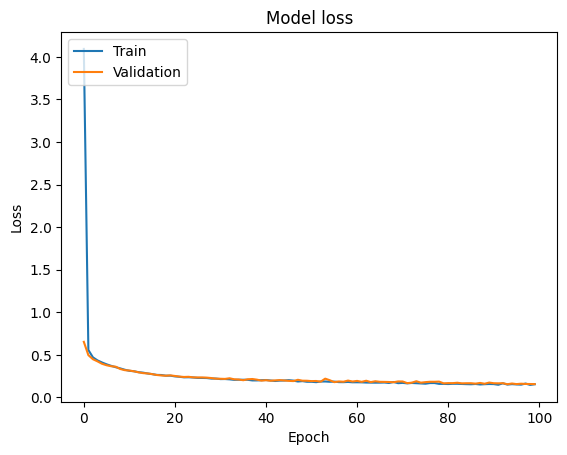

In [44]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [45]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9877 - loss: 0.1459
Test Loss: 0.14782172441482544
Test Accuracy: 0.9888511896133423
